# Title: Facilitate search of place to live in based on venues of interest with geolocation data and Foursquare provided data - case study Sydney/Australia

### Problem statement: 

Sydney is a big multicultural city in which many people migrating to Australia try to go and live in. But people coming to live in Sydney do not have a quick way to choose which neighborhood to live in based on types of venues they like.
This data can also be used by people trying to open business in  different neighborhoods by checking what are the most popular venues there and make decisions accordingly. i.e if a venues has many clinics , you can open a pharmacy there.

### Approach:

The main objective of this project, is to facilitate users looking to live close to different venues. i.e Church or Asian Restaurant or Schools or Clinics .... 
This will be achieved by gathering geolocation data on different neighbourhoods in Sydney and using data from Foursquare, gather closest venues to each neighborhood. 
Clusters will be created to show which neighborhoods fall into different categories. And with this data in hand  one can chose a place to live in based on which cluster the neighborhoods falls in.
Where the dat is collected from and the way it is collected is described in below sections.


### Requirement:

Get the suburbs and Area code.
Get the geolocation data for different neighborhoods. 
Get venues for each neighborhoods at least 1km from neighborhood center.
Use clustering techniques to learn more about the neighborhoods.


### Data Collection:

The Suburbs and Area code will be collected from from https://www.matthewproctor.com/full_australian_postcodes_nsw and their corresponding longitude and latitude information will be done using geocoder module. This data will be complemented by the venues data colected from FourSquare in order to have a DataFrame having geo-location and venues information.

### Data understanding and preparation:

Clean up the data to remove irrelevant info and duplicate from the neighborhood and Area code dataset if they exist then add geolocation data to neighboorhood and area code data. Use Foursquare API to gather venues in different area codes. Finally create a dataframe with Area code, Neighborhood and venues.

### Data Modeling:

Using Kmeans clustering, I will create  clusters based on top venues in neighborhood and based on clusters top venues I will name their categories in a human friendly way so that people who need to make decision based on that can decide quickly

### Data evaluation:

I will assess the clusters created and check if the recommendation based on clusters can work.

## Data Collection

Download the data set from https://www.matthewproctor.com/full_australian_postcodes_nsw and transform it into a dataframe using Beautifulsoup and pandas

In [10]:
# Import libraries
import pandas as pd
import requests
from bs4 import BeautifulSoup

### Creating the Data frame

In [26]:
# Download data, this data containns all suburbs in NSW. Sydney is in NSW
url ='https://www.matthewproctor.com/full_australian_postcodes_nsw'
#nsw_df = pd.read_html(url)
source = requests.get(url).text
soup = BeautifulSoup(source, 'html5lib')

In [55]:
x=soup.find_all('tr')


columns =[]
for i in x[0].find_all('td'):
    columns.append(i.get_text())
print(columns)

data_dict={'Postcode':[],
 'Locality':[],
 'State':[],
 'Longitude':[],
 'Latitude':[],
 'Category':[],
 'Type':[],
 'SA4':[],
 'SA3 Name':[],
 'SA4 Name':[]}



for row in soup.find_all('tr')[1:]:
    column_data = row.find_all('td')
    if len(column_data) == 14:
        data_dict["Postcode"].append(column_data[1].get_text())
        data_dict["Locality"].append(column_data[2].get_text())
        data_dict["State"].append(column_data[3].get_text())
        data_dict["Longitude"].append(column_data[4].get_text())
        data_dict["Latitude"].append(column_data[5].get_text())
        data_dict["Category"].append(column_data[6].get_text())  
        data_dict["Type"].append(column_data[7].get_text())
        data_dict["SA3 Name"].append(column_data[9].get_text())
        data_dict["SA4"].append(column_data[10].get_text())
        data_dict["SA4 Name"].append(column_data[11].get_text())
    
data_dict
df = pd.DataFrame(data_dict)
df.rename(columns={"Locality":"Suburb"},inplace=True)
df.tail()

['ID', 'Postcode', 'Locality', 'State', 'Longitude', 'Latitude', 'Category', 'Type', 'SA3', 'SA3 Name', 'SA4', 'SA4 Name', 'Region', 'Status']


,Postcode,Suburb,State,Longitude,Latitude,Category,Type,SA4,SA3 Name,SA4 Name
5535,4380,RUBY CREEK,NSW,152.0183455,-28.62591135,Delivery Area,Delivery Area,307,Granite Belt,Darling Downs - Maranoa
5536,4380,UNDERCLIFFE,NSW,152.1822634,-28.62255099,Delivery Area,Delivery Area,307,Granite Belt,Darling Downs - Maranoa
5537,4383,JENNINGS,NSW,151.9694117,-28.94051178,Delivery Area,Delivery Area,307,Granite Belt,Darling Downs - Maranoa
5538,4385,CAMP CREEK,NSW,150.8803595,-28.75511649,Delivery Area,Delivery Area,307,Darling Downs (West) - Maranoa,Darling Downs - Maranoa
5539,4385,TEXAS,NSW,,,,,,,


In [56]:
df.shape

(5540, 10)

In [74]:
# get Neighborshood in Sydney Metropolitan Area
# drop rows with empty SA4 name 
# get Sydney in SA4 Name
# drop postcode above 2999 and below 2000

#df_syd_metro = df.loc[[df['SA3 Name']]]
syd_sub = ["sydney" in i.lower() for i in list(df["SA4 Name"])]
df_syd_metro = df.loc[syd_sub].reset_index(drop=True)

In [75]:
df_syd_metro

,Postcode,Suburb,State,Longitude,Latitude,Category,Type,SA4,SA3 Name,SA4 Name
0,1001,SYDNEY,NSW,151.268071,-33.794883,LVR,LVR,117,Sydney Inner City,Sydney - City and Inner South
1,1002,SYDNEY,NSW,151.268071,-33.794883,LVR,LVR,117,Sydney Inner City,Sydney - City and Inner South
2,1003,SYDNEY,NSW,151.268071,-33.794883,LVR,LVR,117,Sydney Inner City,Sydney - City and Inner South
3,1004,SYDNEY,NSW,151.268071,-33.794883,LVR,LVR,117,Sydney Inner City,Sydney - City and Inner South
4,1005,SYDNEY,NSW,151.268071,-33.794883,LVR,LVR,117,Sydney Inner City,Sydney - City and Inner South
...,...,...,...,...,...,...,...,...,...,...
1350,2790,VALE OF CLWYDD,NSW,150.1850644,-33.49009916,Delivery Area,Delivery Area,124,Blue Mountains,Sydney - Outer West and Blue Mountains
1351,2790,WOLGAN VALLEY,NSW,150.356874,-33.310653,Delivery Area,Delivery Area,124,Blue Mountains,Sydney - Outer West and Blue Mountains
1352,2790,WOLLANGAMBE,NSW,150.4413864,-33.34286524,Delivery Area,Delivery Area,124,Blue Mountains,Sydney - Outer West and Blue Mountains
1353,4327,North Sydney,NSW,151.204557,-33.839863,Delivery Area,Delivery Area,121,North Sydney - Mosman,Sydney - North Sydney and Hornsby


In [76]:
# Remove duplicate Longitude Latitude address
df_new = df_syd_metro[~df_syd_metro.duplicated(['Longitude','Latitude'])].reset_index(drop=True)
df_new

,Postcode,Suburb,State,Longitude,Latitude,Category,Type,SA4,SA3 Name,SA4 Name
0,1001,SYDNEY,NSW,151.268071,-33.794883,LVR,LVR,117,Sydney Inner City,Sydney - City and Inner South
1,1032,SYDNEY,NSW,150.874182,-33.662834,LVR,LVR,117,Sydney Inner City,Sydney - City and Inner South
2,1116,SYDNEY,NSW,150.866145,-33.666729,LVR,LVR,117,Sydney Inner City,Sydney - City and Inner South
3,1117,SYDNEY,NSW,150.87022,-33.664575,LVR,LVR,117,Sydney Inner City,Sydney - City and Inner South
4,1132,SYDNEY,NSW,150.874265,-33.66279,LVR,LVR,117,Sydney Inner City,Sydney - City and Inner South
...,...,...,...,...,...,...,...,...,...,...
394,2790,SOUTH LITTLETON,NSW,150.1373195,-33.50065259,Delivery Area,Delivery Area,124,Blue Mountains,Sydney - Outer West and Blue Mountains
395,2790,SPRINGVALE,NSW,150.11719,-33.412094,Delivery Area,Delivery Area,124,Blue Mountains,Sydney - Outer West and Blue Mountains
396,2790,STATE MINE GULLY,NSW,150.2051736,-33.44813394,Delivery Area,Delivery Area,124,Blue Mountains,Sydney - Outer West and Blue Mountains
397,2790,VALE OF CLWYDD,NSW,150.1850644,-33.49009916,Delivery Area,Delivery Area,124,Blue Mountains,Sydney - Outer West and Blue Mountains


In [99]:
k=list(df["Suburb"])
k.index("Wiley Park".upper())
df_new.to_csv('df_new.csv')

In [124]:
# get Neighborshood in Sydney Metropolitan Area
# drop rows with empty SA4 name 
# get Sydney in SA4 Name
# drop postcode above 2999 and below 2000 as NSW area codes are in that range: ref https://www.geonames.org/postal-codes/AU/NSW/new-south-wales.html
# 
# sort Data frame by Postcode
df_new.sort_values(by=["Postcode"])
start_index = df_new[df_new["Postcode"]=="2000"].index.values[0]
df_new_1 = df_new.iloc[start_index:].reset_index(drop=True)
#drop duplicate Area code
df_clean = df_new_1[~df_new_1.duplicated(['Postcode'])].reset_index(drop=True)
#drop unnecessary columns
df_clean = df_clean[["Postcode","Suburb", "State", "SA3 Name"]]
df_clean

,Postcode,Suburb,State,SA3 Name
0,2000,BARANGAROO,NSW,Sydney Inner City
1,2006,THE UNIVERSITY OF SYDNEY,NSW,Sydney Inner City
2,2007,BROADWAY,NSW,Sydney Inner City
3,2008,CHIPPENDALE,NSW,Sydney Inner City
4,2009,DARLING ISLAND,NSW,Sydney Inner City
...,...,...,...,...
251,2784,BULLABURRA,NSW,Blue Mountains
252,2785,BLACKHEATH,NSW,Blue Mountains
253,2786,BELL,NSW,Blue Mountains
254,2787,BLACK SPRINGS,NSW,Penrith


In [118]:
# install Geocoder
!conda install -c conda-forge geocoder --yes

Solving environment: ...working... done

# All requested packages already installed.



In [119]:
#using Geocoder to add Longitude and latitude info
# Get the coordinates of different area codes

import geocoder 

#initializa list containing Longitudes and latitude
longi_list =[]
lati_list=[]
for code in df_clean['Postcode']:
    # initialize your variable to None
    lat_lng_coords = None
    # loop until you get the coordinates
    while(lat_lng_coords is None):
        g = geocoder.google('{}, Sydney, NSW'.format(code),key='Google API Key')
        lat_lng_coords = g.latlng
        print("request for {}".format(code))
    #populate data in longitude and latitude lists
    lati_list.append(lat_lng_coords[0])
    longi_list.append(lat_lng_coords[1])
print("Geocoder complete")

request for 2000
request for 2006
request for 2007
request for 2008
request for 2009
request for 2010
request for 2011
request for 2015
request for 2016
request for 2017
request for 2018
request for 2019
request for 2020
request for 2021
request for 2022
request for 2023
request for 2024
request for 2026
request for 2027
request for 2028
request for 2029
request for 2030
request for 2031
request for 2032
request for 2033
request for 2034
request for 2035
request for 2036
request for 2037
request for 2038
request for 2039
request for 2040
request for 2041
request for 2042
request for 2043
request for 2044
request for 2045
request for 2046
request for 2047
request for 2048
request for 2049
request for 2050
request for 2055
request for 2057
request for 2060
request for 2061
request for 2062
request for 2064
request for 2065
request for 2066
request for 2067
request for 2068
request for 2069
request for 2070
request for 2071
request for 2072
request for 2073
request for 2074
request for 20

In [125]:
# Populate the DF with the longitude and latitude info
df_clean['Latitude']=lati_list
df_clean['Longitude']=longi_list
df_clean = df_clean[["Postcode","Suburb","Longitude","Latitude", "State", "SA3 Name"]]
df_clean.rename(columns={"SA3 Name":"Area Name"},inplace=True)


In [126]:
#save clean DF to csv for future use
df_clean.to_csv('sydney_df.csv')
df_clean

,Postcode,Suburb,Longitude,Latitude,State,Area Name
0,2000,BARANGAROO,151.209295,-33.868820,NSW,Sydney Inner City
1,2006,THE UNIVERSITY OF SYDNEY,151.209295,-33.868820,NSW,Sydney Inner City
2,2007,BROADWAY,151.197131,-33.882319,NSW,Sydney Inner City
3,2008,CHIPPENDALE,151.209295,-33.868820,NSW,Sydney Inner City
4,2009,DARLING ISLAND,151.194217,-33.868789,NSW,Sydney Inner City
...,...,...,...,...,...,...
251,2784,BULLABURRA,151.209295,-33.868820,NSW,Blue Mountains
252,2785,BLACKHEATH,151.209295,-33.868820,NSW,Blue Mountains
253,2786,BELL,150.321112,-33.511587,NSW,Blue Mountains
254,2787,BLACK SPRINGS,149.933476,-33.963276,NSW,Penrith


###  Using Foursquare API to gather  info for different suburbs

In [60]:
#import more libraries
#!conda install -c conda-forge geopy --yes
#!conda install -c conda-forge folium --yes
from geopy.geocoders import Nominatim   # convert names into Latitude and Longitude
import numpy as np                   
import matplotlib.pyplot as plt 
import matplotlib.cm as cm
import matplotlib.colors as colors
import json
from pandas.io.json import json_normalize  # used to normalize json files 
import requests                            # used to connect to REST-API
from sklearn.cluster import KMeans         # used for clustering
import folium                              # for maps 
print("Libraries imported ")

Libraries imported 


In [138]:
# define my Foursquare credentials 
CLIENT_ID = 'CL_ID' # your Foursquare ID
CLIENT_SECRET = 'CL_SEC' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 200 # A default Foursquare API limit value
RADIUS = 1000 # define a radius of 1Km for exploration
# lets define one suburb to explore
suburb_name = df_clean.loc[0,"Suburb"]
suburb_latitude = df_clean.loc[0,"Latitude"]
suburb_longitude = df_clean.loc[0,"Longitude"]
#URL used by requests to explore the place 
url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(CLIENT_ID,CLIENT_SECRET,VERSION,suburb_latitude,suburb_longitude,RADIUS,LIMIT)


In [139]:
# Foursquare explore
foursquare_res = requests.get(url).json()
foursquare_res

{'meta': {'code': 200, 'requestId': '5fd2957e8cc76a4d45751d6c'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Sydney City Center',
  'headerFullLocation': 'Sydney City Center, Sydney',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 239,
  'suggestedBounds': {'ne': {'lat': -33.85981969099999,
    'lng': 151.22011452353524},
   'sw': {'lat': -33.877819709000015, 'lng': 151.19847647646475}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '546410e9498e63f85ab385b0',
       'name': 'UNIQLO',
       'location': {'address': 'L01.01 Level 1, Mid City Centre',
        'crossStreet': '197 Pitt St Mall',
        'lat': -33.869743834120186,
        'lng': 151.2083189425434

In [144]:
# save to a file for future reference and explore the data structure
with open("venues_2000.txt",'w') as f:
    f.write(json.dumps(foursquare_res))

Functions to extract the data from the Foursquare returned data

In [145]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [148]:
# Function to get data for all suburbs and return the categories
def getNearbyVenues(names, latitudes, longitudes, radius=1000, LIMIT=100):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
        try:
            
            
        # make the GET request
            results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
            venues_list.append([(
                name, 
                lat, 
                lng, 
                v['venue']['name'], 
                v['venue']['location']['lat'], 
                v['venue']['location']['lng'],  
                v['venue']['categories'][0]['name']) for v in results])
        except:
            print("missing data")
                

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Suburb', 
                  'Suburb Latitude', 
                  'Suburb Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

Define variable to use for getting suburbs venues and get the data using above defined functions

In [149]:

names = df_clean['Suburb'].to_list()
latitudes = df_clean['Latitude'].to_list()
longitudes  = df_clean['Longitude'].to_list()
sydney_venues = getNearbyVenues(names, latitudes, longitudes, radius=1000)
print("data gathered")

BARANGAROO
THE UNIVERSITY OF SYDNEY
BROADWAY
CHIPPENDALE
DARLING ISLAND
DARLINGHURST
ELIZABETH BAY
ALEXANDRIA
REDFERN
WATERLOO
EASTLAKES
BANKSMEADOW
MASCOT
CENTENNIAL PARK
BONDI JUNCTION
BELLEVUE HILL
BRONTE
BEN BUCKLER
DARLING POINT
DOUBLE BAY
ROSE BAY
DIAMOND BAY
CLOVELLY
DACEYVILLE
KENSINGTON
COOGEE
MAROUBRA
CHIFLEY
FOREST LODGE
ANNANDALE
ROZELLE
LEICHHARDT
BALMAIN
ENMORE
ERSKINEVILLE
ST PETERS
HABERFIELD
ABBOTSFORD
DRUMMOYNE
STANMORE
LEWISHAM
CAMPERDOWN
NORTH SYDNEY
CHATSWOOD
HMAS PLATYPUS
KIRRIBILLI
CAMMERAY
ARTARMON
CROWS NEST
LANE COVE
CHATSWOOD
CASTLECRAG
missing data
CASTLE COVE
EAST LINDFIELD
missing data
EAST KILLARA
GORDON
PYMBLE
BOBBIN HEAD
NORTH ST IVES
NORMANHURST
ASQUITH
MOUNT COLAH
MOUNT KURING-GAI
BEROWRA
BEROWRA CREEK
BAR POINT
AKUNA BAY
BELROSE
FRENCHS FOREST
FORESTVILLE
MOSMAN
KURRABA POINT
CREMORNE
SEAFORTH
BALGOWLAH
FAIRLIGHT
MANLY
CURL CURL
COLLAROY
CROMER
ALLAMBIE
ELANORA HEIGHTS
WARRIEWOOD
MONA VALE
BAYVIEW
CHURCH POINT
NEWPORT
AVALON
COASTERS RETREAT
MACQUARI

## Data Understanding

### Sydney venues Data frame exploration

In [150]:
sydney_venues

,Suburb,Suburb Latitude,Suburb Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,BARANGAROO,-33.868820,151.209295,UNIQLO,-33.869744,151.208319,Clothing Store
1,BARANGAROO,-33.868820,151.209295,Haigh's Chocolates,-33.869207,151.207129,Candy Store
2,BARANGAROO,-33.868820,151.209295,The Strand Arcade,-33.869420,151.207630,Shopping Mall
3,BARANGAROO,-33.868820,151.209295,Gumption by Coffee Alchemy,-33.869440,151.207700,Coffee Shop
4,BARANGAROO,-33.868820,151.209295,Skywalk On Sydney Tower,-33.870432,151.208871,Scenic Lookout
...,...,...,...,...,...,...,...
8800,BLACKHEATH,-33.868820,151.209295,Ramblin' Rascal Tavern,-33.873295,151.209773,Bar
8801,BLACKHEATH,-33.868820,151.209295,Cabrito Coffee Traders,-33.862516,151.209324,Café
8802,BLACKHEATH,-33.868820,151.209295,Art Gallery of New South Wales,-33.868821,151.217298,Art Gallery
8803,BLACKHEATH,-33.868820,151.209295,Hobbyco,-33.872218,151.206788,Hobby Shop


How many unique categories ?

In [165]:
len(sydney_venues["Venue Category"].unique())

330

Most common venues in Sydney

In [157]:
sydney_venues.groupby(["Venue Category"]).count().sort_values(by=["Suburb"],ascending=False).head(10)

,Suburb,Suburb Latitude,Suburb Longitude,Venue,Venue Latitude,Venue Longitude
Venue Category,,,,,,
Café,1191,1191,1191,1191,1191,1191
Coffee Shop,401,401,401,401,401,401
Bar,338,338,338,338,338,338
Cocktail Bar,312,312,312,312,312,312
Park,283,283,283,283,283,283
Shopping Mall,269,269,269,269,269,269
Hotel,206,206,206,206,206,206
Pizza Place,185,185,185,185,185,185
Thai Restaurant,177,177,177,177,177,177


From this we may tend to say that People like coffee and like going to bar considering we have many coffee shops and bars in Sydney.
Also having these many parks, Sydney looks like a vivid place.

Group venues per Suburb

In [163]:
sydney_venues.groupby(["Suburb"]).count().sort_values(by=["Venue"],ascending=False).head(20)

,Suburb Latitude,Suburb Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Suburb,,,,,,
CHATSWOOD,200,200,200,200,200,200
DARLING POINT,100,100,100,100,100,100
LAWSON,100,100,100,100,100,100
CANOELANDS,100,100,100,100,100,100
CAMPERDOWN,100,100,100,100,100,100
EPPING,100,100,100,100,100,100
BULLABURRA,100,100,100,100,100,100
BUCKETTY,100,100,100,100,100,100
BRONTE,100,100,100,100,100,100


Suburbs having less than 10 venues

In [183]:
tmp_df = sydney_venues.groupby(["Suburb"]).count().sort_values(by=["Venue"],ascending=False).reset_index()
suburbs_with_few_venues = tmp_df.loc[tmp_df['Venue']<10].reset_index(drop=True)
suburbs_with_few_venues

,Suburb,Suburb Latitude,Suburb Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,BOW BOWING,9,9,9,9,9,9
1,BUNGARRIBEE,9,9,9,9,9,9
2,BIRRONG,9,9,9,9,9,9
3,CHULLORA,9,9,9,9,9,9
4,PYMBLE,9,9,9,9,9,9
...,...,...,...,...,...,...,...
72,BADGERYS CREEK,1,1,1,1,1,1
73,CECIL PARK,1,1,1,1,1,1
74,SILVERDALE,1,1,1,1,1,1
75,BLAXLAND,1,1,1,1,1,1


In [160]:
sydney_venues.groupby(["Suburb","Venue Category"]).count().sort_values(by=["Venue"],ascending=False).head(10)

,,Suburb Latitude,Suburb Longitude,Venue,Venue Latitude,Venue Longitude
Suburb,Venue Category,,,,,
CHATSWOOD,Café,26,26,26,26,26
HMAS PLATYPUS,Café,26,26,26,26,26
ANNANDALE,Café,24,24,24,24,24
REDFERN,Café,23,23,23,23,23
BALMAIN,Café,22,22,22,22,22
CROWS NEST,Café,20,20,20,20,20
FOREST LODGE,Café,20,20,20,20,20
STANMORE,Café,19,19,19,19,19
ERSKINEVILLE,Café,18,18,18,18,18


In [166]:
# save the data frame
sydney_venues.to_csv("sydney_venues.csv")

We can see the cafees are the most wide spread venues

#### Analyze Suburbs by most frequent venues

I will use one-hot-encoding to transform categorical variables(venues categories) into actionable  encoding that can allow me to later cluster suburbs based on venues.

In [172]:
# Create a DF with Suburb names and corresponding venues
sydney_venues_onehot = pd.get_dummies(sydney_venues[['Venue Category']],prefix="", prefix_sep="")
sydney_venues_onehot['Suburb']=sydney_venues['Suburb']
# bring the Suburb name column at First position
fixed_columns = [sydney_venues_onehot.columns[-1]] + list(sydney_venues_onehot.columns[:-1])
sydney_venues_onehot = sydney_venues_onehot[fixed_columns]

sydney_venues_onehot.head()

,Suburb,ATM,Accessories Store,Afghan Restaurant,Airfield,American Restaurant,Antique Shop,Aquarium,Arcade,Argentinian Restaurant,...,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Waterfront,Whisky Bar,Wine Bar,Wine Shop,Women's Store,Yoga Studio,Zoo Exhibit
0,BARANGAROO,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,BARANGAROO,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,BARANGAROO,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,BARANGAROO,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,BARANGAROO,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Lets group rows per suburb and calculate the mean of each category so that we can see the contribution of each suburb in the overall venue statistics.

In [174]:
sydney_venues_onehot_grouped = sydney_venues_onehot.groupby('Suburb').mean().reset_index()
sydney_venues_onehot_grouped

,Suburb,ATM,Accessories Store,Afghan Restaurant,Airfield,American Restaurant,Antique Shop,Aquarium,Arcade,Argentinian Restaurant,...,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Waterfront,Whisky Bar,Wine Bar,Wine Shop,Women's Store,Yoga Studio,Zoo Exhibit
0,ABBOTSBURY,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.0,0.0,0.00,0.0,0.0000,0.0,0.0,0.0
1,ABBOTSFORD,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.0,0.0,0.00,0.0,0.0625,0.0,0.0,0.0
2,ACACIA GARDENS,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.0,0.0,0.00,0.0,0.0000,0.0,0.0,0.0
3,AGNES BANKS,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.0,0.0,0.00,0.0,0.0000,0.0,0.0,0.0
4,AIRDS,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.0,0.0,0.00,0.0,0.0000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233,WARRIEWOOD,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.0,0.0,0.00,0.0,0.0000,0.0,0.0,0.0
234,WATERLOO,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.01,0.0,0.0,0.0,0.01,0.0,0.0000,0.0,0.0,0.0
235,WENTWORTH FALLS,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.01,0.0,0.0,0.0,0.01,0.0,0.0000,0.0,0.0,0.0
236,WEST PENNANT HILLS,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.0,0.0,0.00,0.0,0.0000,0.0,0.0,0.0


In [185]:
# save for future reference
sydney_venues_onehot_grouped.to_csv('sydney_venues_onehot_grouped.csv')

Lets load Sydney venues data from the created CSV file

In [25]:
import pandas as pd
import numpy as np
sydney_venues_onehot_grouped = pd.read_csv('sydney_venues_onehot_grouped.csv',index_col=0)
sydney_venues_onehot_grouped.head()

,Suburb,ATM,Accessories Store,Afghan Restaurant,Airfield,American Restaurant,Antique Shop,Aquarium,Arcade,Argentinian Restaurant,...,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Waterfront,Whisky Bar,Wine Bar,Wine Shop,Women's Store,Yoga Studio,Zoo Exhibit
0,ABBOTSBURY,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0
1,ABBOTSFORD,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0625,0.0,0.0,0.0
2,ACACIA GARDENS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0
3,AGNES BANKS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0
4,AIRDS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0


Lets Create a DataFrame having 20 most common venues in every suburb

First, let's write a function to sort the venues in descending order.

In [54]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    
    # get rid of null categories as some suburbs have less than 10 venues
    row_categories_tmp = {}
    for k,v in row_categories.items():
        if v != 0:
          row_categories_tmp[k]=v
    #create a temporary df
    pddfm = pd.DataFrame(row_categories_tmp.items())
    pddfm_1 = pddfm.rename(columns={0:'Venue',1:'Freq'})
    pddfm_loc = pddfm_1.iloc[0:]
    row_categories_sorted = pddfm_loc.sort_values(by='Freq',ascending=False)
#   temporary list of venue sorted
    tmp_list = list(row_categories_sorted.Venue.values[0:num_top_venues]) 
    # since some suburbs have less than 20 venues, fill missing venue categories with NaN values
    for i in np.arange (len (tmp_list), num_top_venues):
        tmp_list.append('NaN')
    row_categories_sorted_arr = np.asarray(tmp_list)
    return row_categories_sorted_arr


Lets  extract the 20 most common venues from each Suburb and add that to a DataFrame

In [101]:
num_top_venues = 20

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Suburb']
for num in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(num+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(num+1))

# create a new dataframe
sydney_venues_sorted = pd.DataFrame(columns=columns)
sydney_venues_sorted['Suburb'] = sydney_venues_onehot_grouped['Suburb']

for index in np.arange(sydney_venues_onehot_grouped.shape[0]):
    sydney_venues_sorted.iloc[index, 1:] = return_most_common_venues(sydney_venues_onehot_grouped.iloc[index, :], num_top_venues)

sydney_venues_sorted.head(100)

,Suburb,1th Most Common Venue,2th Most Common Venue,3th Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,...,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue,16th Most Common Venue,17th Most Common Venue,18th Most Common Venue,19th Most Common Venue,20th Most Common Venue
0,ABBOTSBURY,Park,Athletics & Sports,Bar,Buffet,Deli / Bodega,Gym,Italian Restaurant,Pizza Place,Shopping Mall,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ABBOTSFORD,Café,Italian Restaurant,Park,Burger Joint,Convenience Store,Grocery Store,Martial Arts School,Pizza Place,Soccer Field,...,Wine Shop,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ACACIA GARDENS,Construction & Landscaping,Convenience Store,Department Store,Fried Chicken Joint,Indian Restaurant,Park,Pub,Supermarket,Train Station,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AGNES BANKS,Campground,Nature Preserve,Park,Rental Car Location,Rock Climbing Spot,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AIRDS,Campground,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,CHESTER HILL,Asian Restaurant,Coffee Shop,Dessert Shop,Falafel Restaurant,Fast Food Restaurant,Fish & Chips Shop,Lebanese Restaurant,Market,Newsstand,...,Soccer Field,Supermarket,Thai Restaurant,Train Station,NaN,NaN,NaN,NaN,NaN,NaN
96,CHIFLEY,Café,Gym,Italian Restaurant,Pizza Place,Restaurant,Shipping Store,Supermarket,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97,CHIPPENDALE,Café,Coffee Shop,Cocktail Bar,Bar,Shopping Mall,Hotel,Speakeasy,Record Shop,Tea Room,...,Candy Store,Steakhouse,Dessert Shop,Park,Electronics Store,Fountain,Spanish Restaurant,Japanese Restaurant,Sandwich Place,Bookstore
98,CHULLORA,Lebanese Restaurant,Burger Joint,Dessert Shop,Food Truck,Frozen Yogurt Shop,Furniture / Home Store,Park,Supermarket,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Data Modelling

### Clusterring Suburbs based on the data available in Sydney venue Categories data set

Determine the best number of clusters 

Text(0, 0.5, 'Sum of squared distance')

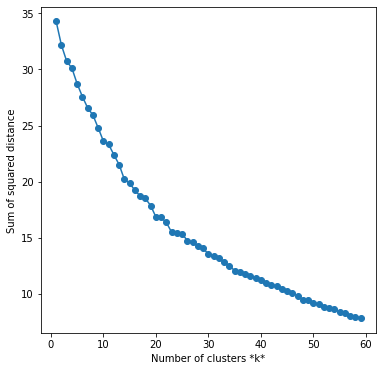

In [118]:
sse = []
list_k = list(range(1, 60))
sydney_venues_grouped_clustering = sydney_venues_onehot_grouped.drop('Suburb', 1)
for k in list_k:
    kmeans = KMeans(n_clusters=k, random_state=0).fit(sydney_venues_grouped_clustering)
    sse.append(kmeans.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance')


I am going to randomly devide the suburbs into 20 clusters. It is hard to choose the best k as the curve keeps declinin for differet values of k. But at k=20 the slope diminishes.

In [131]:
# set number of clusters
kclusters = 20

sydney_venues_grouped_clustering = sydney_venues_onehot_grouped.drop('Suburb', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(sydney_venues_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:200]

array([ 2,  1,  2,  2,  3,  6,  8,  2,  8,  2,  1,  5,  8,  2,  0,  1,  2,
        2,  8,  2,  1, 12,  1,  8,  6,  1,  1,  2,  8,  8,  0, 13,  8,  9,
        2,  0,  1,  8,  2,  1,  1,  1,  1, 14,  1,  4,  2, 15,  1,  1, 12,
       12,  8,  9, 13,  2, 17,  1, 19,  2,  1,  0,  1,  0,  1,  0,  1,  8,
        8,  8,  1,  2,  2,  0,  2,  2,  1,  8,  2,  8,  6,  1,  2,  1,  0,
        1,  2, 19,  2,  2,  7,  1,  8,  8,  1,  2,  1,  8,  2, 11,  1,  1,
        2,  0,  1,  2,  8,  1,  1,  1,  8,  2,  1,  1,  2,  1,  0,  8,  8,
        8,  8,  2,  2,  8,  9,  8, 15,  1,  1,  1,  0,  2,  2,  6,  0,  8,
        2, 12,  8,  8,  2,  1,  8,  2,  1,  1,  2,  1,  2,  1,  1,  1,  2,
        1, 13,  1,  2,  2,  1,  2,  1,  1,  2, 12,  1, 10,  1,  1,  2,  1,
        1,  2,  2,  2,  1,  1,  2,  8,  0,  1,  8,  1,  8, 12,  2,  1,  1,
        2,  1,  8, 12,  1, 18,  2,  1,  1,  1,  6, 12,  1])

Let's create a new dataframe that includes the cluster as well as the top 20 venues for each neighborhood.

In [97]:
# Sydney Suburbs
sydney_suburbs_df_clean=pd.read_csv("sydney_venues.csv")
sydney_suburbs_df_clean =sydney_suburbs_df_clean[["Suburb","Suburb Latitude","Suburb Longitude"]]
sydney_suburbs_df_clean = sydney_suburbs_df_clean[~sydney_suburbs_df_clean.duplicated(['Suburb'])].reset_index(drop=True)
sydney_suburbs_df_clean = sydney_suburbs_df_clean.sort_values(by="Suburb")

In [102]:
# add clustering labels
sydney_venues_sorted_temp=sydney_venues_sorted
sydney_venues_sorted_temp.insert(0, 'Cluster Labels', kmeans.labels_)
sydney_venues_merged = sydney_suburbs_df_clean
# merge Sydney suburbs DF with sydney_venue_sorted to add latitude/longitude for each neighborhood
sydney_venues_merged = sydney_venues_merged.join(sydney_venues_sorted_temp.set_index('Suburb'), on='Suburb')

sydney_venues_merged.head()

,Suburb,Suburb Latitude,Suburb Longitude,Cluster Labels,1th Most Common Venue,2th Most Common Venue,3th Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,...,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue,16th Most Common Venue,17th Most Common Venue,18th Most Common Venue,19th Most Common Venue,20th Most Common Venue
147,ABBOTSBURY,-33.870941,150.878382,2,Park,Athletics & Sports,Bar,Buffet,Deli / Bodega,Gym,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37,ABBOTSFORD,-33.856669,151.131581,1,Café,Italian Restaurant,Park,Burger Joint,Convenience Store,Grocery Store,...,Wine Shop,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
220,ACACIA GARDENS,-33.720658,150.890015,2,Construction & Landscaping,Convenience Store,Department Store,Fried Chicken Joint,Indian Restaurant,Park,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
213,AGNES BANKS,-33.614942,150.698199,2,Campground,Nature Preserve,Park,Rental Car Location,Rock Climbing Spot,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
197,AIRDS,-34.236467,150.814422,3,Campground,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [116]:
# save for future use
sydney_venues_merged.to_csv('sydney_venues_merged.csv')

## Visualize the cluster on the map

In [103]:
# create map centered at BARANGAROO -33.868820	151.209295	
latitude = -33.868820		
longitude = 151.209295
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(sydney_venues_merged['Suburb Latitude'], sydney_venues_merged['Suburb Longitude'], sydney_venues_merged['Suburb'], sydney_venues_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

Lets display the content of the first 5 clusters

cluster 1

In [110]:
sydney_venues_merged.loc[sydney_venues_merged['Cluster Labels'] == 0, sydney_venues_merged.columns[[0] + list(range(4, sydney_venues_merged.shape[1]))]]

,Suburb,1th Most Common Venue,2th Most Common Venue,3th Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,...,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue,16th Most Common Venue,17th Most Common Venue,18th Most Common Venue,19th Most Common Venue,20th Most Common Venue
122,ARNDELL PARK,Burger Joint,Fast Food Restaurant,Liquor Store,Pizza Place,Thai Restaurant,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
206,BANNABY,Motel,Diner,Fast Food Restaurant,RV Park,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
158,BASS HILL,Fast Food Restaurant,Gym,Shopping Mall,Bakery,Bar,Big Box Store,Café,Department Store,Garden Center,...,Middle Eastern Restaurant,Park,Pizza Place,Pub,Sandwich Place,NaN,NaN,NaN,NaN,NaN
148,BONNYRIGG,Fast Food Restaurant,Pizza Place,Dessert Shop,Food & Drink Shop,Gym / Fitness Center,Neighborhood,Park,Sandwich Place,Shopping Mall,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
201,BOW BOWING,Fast Food Restaurant,Coffee Shop,Convenience Store,Department Store,Grocery Store,Sandwich Place,Shopping Mall,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
193,BRINGELLY,Convenience Store,Fast Food Restaurant,Soccer Field,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
111,BURWOOD HEIGHTS,Fast Food Restaurant,Hotel,Asian Restaurant,Bowling Alley,Chinese Restaurant,Convenience Store,Gym,Indian Restaurant,Paper / Office Supplies Store,...,Sandwich Place,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
135,CARRAMAR,Bowling Alley,Climbing Gym,Electronics Store,Fast Food Restaurant,Grocery Store,Liquor Store,Supermarket,Train Station,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
218,COLEBEE,Fast Food Restaurant,Sandwich Place,Australian Restaurant,Café,Coffee Shop,Convenience Store,Donut Shop,Electronics Store,Fish & Chips Shop,...,Park,Pharmacy,Shopping Mall,NaN,NaN,NaN,NaN,NaN,NaN,NaN
202,CURRANS HILL,Fast Food Restaurant,Coffee Shop,Grocery Store,Gym,Pharmacy,Shopping Mall,Supermarket,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


cluster 2

In [112]:
sydney_venues_merged.loc[sydney_venues_merged['Cluster Labels'] == 1, sydney_venues_merged.columns[[0] + list(range(4, sydney_venues_merged.shape[1]))]]

,Suburb,1th Most Common Venue,2th Most Common Venue,3th Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,...,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue,16th Most Common Venue,17th Most Common Venue,18th Most Common Venue,19th Most Common Venue,20th Most Common Venue
37,ABBOTSFORD,Café,Italian Restaurant,Park,Burger Joint,Convenience Store,Grocery Store,Martial Arts School,Pizza Place,Soccer Field,...,Wine Shop,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29,ANNANDALE,Café,Pub,Park,Grocery Store,Pizza Place,Wine Shop,Convenience Store,Italian Restaurant,Gym,...,Fish & Chips Shop,Liquor Store,Sushi Restaurant,Australian Restaurant,Bus Stop,Snack Place,Martial Arts School,Middle Eastern Restaurant,Motorcycle Shop,Paper / Office Supplies Store
47,ARTARMON,Café,Japanese Restaurant,Pub,Thai Restaurant,Convenience Store,Electronics Store,Fast Food Restaurant,Furniture / Home Store,Gas Station,...,BBQ Joint,Liquor Store,Motel,Park,Pharmacy,Ramen Restaurant,Sandwich Place,Sushi Restaurant,Asian Restaurant,NaN
188,AUDLEY,Café,Pub,Coffee Shop,Convenience Store,Thai Restaurant,Japanese Restaurant,Chinese Restaurant,Train Station,Sushi Restaurant,...,Shopping Mall,Shop & Service,Sandwich Place,Ramen Restaurant,Pizza Place,Platform,Liquor Store,Indian Restaurant,Gym,Grocery Store
84,AVALON,Café,Beach,Australian Restaurant,Bakery,Health & Beauty Service,Japanese Restaurant,Sandwich Place,Supermarket,Tea Room,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30,ROZELLE,Café,Pub,Park,Vegetarian / Vegan Restaurant,Pizza Place,Bakery,Bar,Italian Restaurant,Soccer Field,...,Sandwich Place,Playground,Seafood Restaurant,Pier,Monument / Landmark,Sushi Restaurant,Salon / Barbershop,Indian Restaurant,Ice Cream Shop,Hotel Bar
104,SILVERWATER,Café,Badminton Court,Electronics Store,Fast Food Restaurant,Furniture / Home Store,Gym / Fitness Center,Pharmacy,Sandwich Place,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39,STANMORE,Café,Pub,Convenience Store,Bar,Sushi Restaurant,Wine Shop,Grocery Store,Furniture / Home Store,Restaurant,...,Pharmacy,Shopping Mall,Sandwich Place,Lebanese Restaurant,Supermarket,Thai Restaurant,Vietnamese Restaurant,Liquor Store,Arts & Crafts Store,Kebab Restaurant
106,SUMMER HILL,Café,Pizza Place,Japanese Restaurant,Bar,Coffee Shop,Convenience Store,Park,Fast Food Restaurant,Motel,...,Light Rail Station,Athletics & Sports,Train Station,Thai Restaurant,Pub,Liquor Store,Grocery Store,Italian Restaurant,Indian Restaurant,Gym / Fitness Center


Cluster3

In [113]:
sydney_venues_merged.loc[sydney_venues_merged['Cluster Labels'] == 2, sydney_venues_merged.columns[[0] + list(range(4, sydney_venues_merged.shape[1]))]]

,Suburb,1th Most Common Venue,2th Most Common Venue,3th Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,...,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue,16th Most Common Venue,17th Most Common Venue,18th Most Common Venue,19th Most Common Venue,20th Most Common Venue
147,ABBOTSBURY,Park,Athletics & Sports,Bar,Buffet,Deli / Bodega,Gym,Italian Restaurant,Pizza Place,Shopping Mall,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
220,ACACIA GARDENS,Construction & Landscaping,Convenience Store,Department Store,Fried Chicken Joint,Indian Restaurant,Park,Pub,Supermarket,Train Station,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
213,AGNES BANKS,Campground,Nature Preserve,Park,Rental Car Location,Rock Climbing Spot,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189,ALFORDS POINT,Supermarket,Fast Food Restaurant,Grocery Store,Auto Workshop,Juice Bar,Thai Restaurant,Sushi Restaurant,Shopping Mall,Pizza Place,...,Liquor Store,Ice Cream Shop,Indoor Play Area,Bakery,Convenience Store,Coffee Shop,Café,Bus Stop,Bus Station,Basketball Court
175,ALLAWAH,Platform,Pub,Chinese Restaurant,Dim Sum Restaurant,Fast Food Restaurant,Football Stadium,Paper / Office Supplies Store,Park,Pet Store,...,Restaurant,Seafood Restaurant,Shoe Store,Sporting Goods Shop,Sports Bar,Theater,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35,ST PETERS,Bus Stop,Athletics & Sports,Gym,Thrift / Vintage Store,Steakhouse,Sporting Goods Shop,Speakeasy,Soccer Field,Sandwich Place,...,Pub,Platform,Pet Store,Liquor Store,Grocery Store,Auto Workshop,Golf Course,Furniture / Home Store,Fruit & Vegetable Store,Food Truck
105,SYDNEY MARKETS,Vietnamese Restaurant,Shoe Store,Clothing Store,Sandwich Place,Grocery Store,Accessories Store,Optical Shop,Train Station,Tennis Stadium,...,Platform,Park,Outlet Store,Outlet Mall,Middle Eastern Restaurant,Night Market,Asian Restaurant,Indian Restaurant,Hockey Field,Golf Course
79,WARRIEWOOD,Supermarket,Bakery,Board Shop,Department Store,Fast Food Restaurant,Garden Center,Middle Eastern Restaurant,Mobile Phone Shop,Movie Theater,...,Toy / Game Store,Trail,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101,WEST PENNANT HILLS,Asian Restaurant,Bakery,Burger Joint,Bus Stop,Café,Park,Soccer Field,Supermarket,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Cluster 4

In [114]:
sydney_venues_merged.loc[sydney_venues_merged['Cluster Labels'] == 3, sydney_venues_merged.columns[[0] + list(range(4, sydney_venues_merged.shape[1]))]]

,Suburb,1th Most Common Venue,2th Most Common Venue,3th Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,...,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue,16th Most Common Venue,17th Most Common Venue,18th Most Common Venue,19th Most Common Venue,20th Most Common Venue
197,AIRDS,Campground,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Cluster 5

In [134]:
sydney_venues_merged.loc[sydney_venues_merged['Cluster Labels'] == 4, sydney_venues_merged.columns[[0] + list(range(4, sydney_venues_merged.shape[1]))]]

,Suburb,1th Most Common Venue,2th Most Common Venue,3th Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,...,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue,16th Most Common Venue,17th Most Common Venue,18th Most Common Venue,19th Most Common Venue,20th Most Common Venue
237,BEN BULLEN,Scenic Lookout,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


cluser 9

In [135]:
sydney_venues_merged.loc[sydney_venues_merged['Cluster Labels'] == 8, sydney_venues_merged.columns[[0] + list(range(4, sydney_venues_merged.shape[1]))]]

,Suburb,1th Most Common Venue,2th Most Common Venue,3th Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,...,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue,16th Most Common Venue,17th Most Common Venue,18th Most Common Venue,19th Most Common Venue,20th Most Common Venue
7,ALEXANDRIA,Café,Coffee Shop,Cocktail Bar,Bar,Shopping Mall,Hotel,Speakeasy,Record Shop,Tea Room,...,Candy Store,Steakhouse,Dessert Shop,Park,Electronics Store,Fountain,Spanish Restaurant,Japanese Restaurant,Sandwich Place,Bookstore
77,ALLAMBIE,Café,Coffee Shop,Cocktail Bar,Bar,Shopping Mall,Hotel,Speakeasy,Record Shop,Tea Room,...,Candy Store,Steakhouse,Dessert Shop,Park,Electronics Store,Fountain,Spanish Restaurant,Japanese Restaurant,Sandwich Place,Bookstore
191,APPLETREE FLAT,Café,Coffee Shop,Cocktail Bar,Bar,Shopping Mall,Hotel,Speakeasy,Record Shop,Tea Room,...,Candy Store,Steakhouse,Dessert Shop,Park,Electronics Store,Fountain,Spanish Restaurant,Japanese Restaurant,Sandwich Place,Bookstore
57,ASQUITH,Café,Coffee Shop,Cocktail Bar,Bar,Shopping Mall,Hotel,Speakeasy,Record Shop,Tea Room,...,Candy Store,Steakhouse,Dessert Shop,Park,Electronics Store,Fountain,Spanish Restaurant,Japanese Restaurant,Sandwich Place,Bookstore
205,AVON,Café,Coffee Shop,Cocktail Bar,Bar,Shopping Mall,Hotel,Speakeasy,Record Shop,Tea Room,...,Candy Store,Steakhouse,Dessert Shop,Park,Electronics Store,Fountain,Spanish Restaurant,Japanese Restaurant,Sandwich Place,Bookstore
11,BANKSMEADOW,Café,Coffee Shop,Cocktail Bar,Bar,Shopping Mall,Hotel,Speakeasy,Record Shop,Tea Room,...,Candy Store,Steakhouse,Dessert Shop,Park,Electronics Store,Fountain,Spanish Restaurant,Japanese Restaurant,Sandwich Place,Bookstore
161,BANKSTOWN,Café,Coffee Shop,Cocktail Bar,Bar,Shopping Mall,Hotel,Speakeasy,Record Shop,Tea Room,...,Candy Store,Steakhouse,Dessert Shop,Park,Electronics Store,Fountain,Spanish Restaurant,Japanese Restaurant,Sandwich Place,Bookstore
0,BARANGAROO,Café,Coffee Shop,Cocktail Bar,Bar,Shopping Mall,Hotel,Speakeasy,Record Shop,Tea Room,...,Candy Store,Steakhouse,Dessert Shop,Park,Electronics Store,Fountain,Spanish Restaurant,Japanese Restaurant,Sandwich Place,Bookstore
81,BAYVIEW,Café,Coffee Shop,Cocktail Bar,Bar,Shopping Mall,Hotel,Speakeasy,Record Shop,Tea Room,...,Candy Store,Steakhouse,Dessert Shop,Park,Electronics Store,Fountain,Spanish Restaurant,Japanese Restaurant,Sandwich Place,Bookstore
236,BLACKHEATH,Café,Coffee Shop,Cocktail Bar,Bar,Shopping Mall,Hotel,Speakeasy,Record Shop,Tea Room,...,Candy Store,Steakhouse,Dessert Shop,Park,Electronics Store,Fountain,Spanish Restaurant,Japanese Restaurant,Sandwich Place,Bookstore


## Data Evaluation

Depending on one`s preference, it will be easier to pick clusters and check which one has venues close to hs preference.

In [136]:
# Lets create a random data sets of values.
random_df = pd.read_csv("sydney_random_onehot.csv", index_col=0).reset_index(drop=True)
random_df = random_df.drop("Suburb",1)


Users will create a random data set like this one. This can be done by a website where users enters preference and those preference can be transformed into a one-hot encoding dataframe liek the following one

In [137]:
random_df

,ATM,Accessories Store,Afghan Restaurant,Airfield,American Restaurant,Antique Shop,Aquarium,Arcade,Argentinian Restaurant,Art Gallery,...,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Waterfront,Whisky Bar,Wine Bar,Wine Shop,Women's Store,Yoga Studio,Zoo Exhibit
0,0,0,0,0,0,0,0,0,0,0.000,...,0.020000,0.000000,0.010000,0,0.00,0.02,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0.000,...,0.000000,0.026316,0.000000,0,0.00,0.00,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0.010,...,0.010000,0.000000,0.000000,0,0.01,0.00,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0.000,...,0.000000,0.000000,0.000000,0,0.00,0.00,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0.000,...,0.000000,0.000000,0.000000,0,0.00,0.00,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0.000,...,0.000000,0.000000,0.037037,0,0.00,0.00,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0.000,...,0.000000,0.000000,0.000000,0,0.00,0.00,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0.000,...,0.013889,0.000000,0.013889,0,0.00,0.00,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0.000,...,0.000000,0.000000,0.100000,0,0.00,0.00,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0.005,...,0.010000,0.000000,0.000000,0,0.01,0.00,0,0,0,0


In [140]:
# predict what cluster might these choise fall into 
predicted_labels = kmeans.predict(random_df)
predicted_labels

array([ 1,  2,  8,  0, 17,  1, 19,  2,  2,  8])

And using these labels different data sets entered by users can be mapped to different clusters 

In [142]:
random_df.insert(0, 'Cluster Labels', predicted_labels)

In [144]:
random_df

,Cluster Labels,ATM,Accessories Store,Afghan Restaurant,Airfield,American Restaurant,Antique Shop,Aquarium,Arcade,Argentinian Restaurant,...,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Waterfront,Whisky Bar,Wine Bar,Wine Shop,Women's Store,Yoga Studio,Zoo Exhibit
0,1,0,0,0,0,0,0,0,0,0,...,0.020000,0.000000,0.010000,0,0.00,0.02,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0.000000,0.026316,0.000000,0,0.00,0.00,0,0,0,0
2,8,0,0,0,0,0,0,0,0,0,...,0.010000,0.000000,0.000000,0,0.01,0.00,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0.000000,0.000000,0.000000,0,0.00,0.00,0,0,0,0
4,17,0,0,0,0,0,0,0,0,0,...,0.000000,0.000000,0.000000,0,0.00,0.00,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0.000000,0.000000,0.037037,0,0.00,0.00,0,0,0,0
6,19,0,0,0,0,0,0,0,0,0,...,0.000000,0.000000,0.000000,0,0.00,0.00,0,0,0,0
7,2,0,0,0,0,0,0,0,0,0,...,0.013889,0.000000,0.013889,0,0.00,0.00,0,0,0,0
8,2,0,0,0,0,0,0,0,0,0,...,0.000000,0.000000,0.100000,0,0.00,0.00,0,0,0,0
9,8,0,0,0,0,0,0,0,0,0,...,0.010000,0.000000,0.000000,0,0.01,0.00,0,0,0,0


We have demonstrated that with Foursquare gathered data, users can choose which cluster of suburbs to live in based on venues preference.

## Conclusion

Using Geolocation data, Foursquare provided data, pandas, numpy and Kmeans clustering we can create a model that can be used by users to choose a location to go to or to live in base on the venues they like. 